In [2]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [4]:
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
# 第一層param: 單一圖w(9 * 3) * n(64) + bias(64)
vgg.summary()


58892288/58889256 [==============================] - 20s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_poo

In [10]:
from keras.datasets.cifar10 import load_data
(x_train, y_train),(x_test, y_test) = load_data()

In [11]:
print ('訓練維度：', x_train.shape)
print ('測試維度：', x_test.shape)

訓練維度： (50000, 32, 32, 3)
測試維度： (10000, 32, 32, 3)


In [12]:
transdict = {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿",
             5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

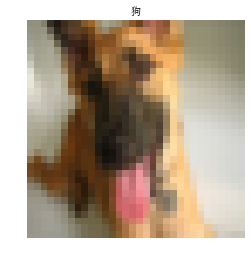

In [15]:
# 秀資料
# https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import random
font = matplotlib.font_manager.FontProperties(fname='NotoSerifCJKtc-Regular.otf')
c = random.randint(0, 49999)
plt.title(transdict[y_train[c][0]],fontproperties=font)
plt.axis("off")
plt.imshow(x_train[c])

In [16]:
# 預處理
# 圖片特徵(題目) 0~1, 如果要in MLP->攤平
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 答案處理 -> One-Hot Encoding
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
print("答案:", y_train[0])
print("One-Hot:", y_train_cat[0])

答案: [6]
One-Hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
cnn = Sequential()
cnn.add(Conv2D(input_shape=(32, 32, 3),
               kernel_size=(3, 3),
               filters=32,
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(kernel_size=(3, 3),
               filters=64,
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(kernel_size=(3, 3),
               filters=128,
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=256, activation="relu"))
cnn.add(Dense(units=10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [19]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# epochs: 整份資料看幾次(10->60000 * 10 = 600000) -> 調整來避免過擬合
# batch: 看幾次一次梯度更新
# ?次:
# verbose: 打印log的詳細程度
history = cnn.fit(x_train_shape, 
                    y_train_cat, 
                    batch_size=200, 
                    epochs=15, 
                    validation_split=0.1, 
                    verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 45s 995us/step - loss: 0.4528 - acc: 0.8419 - val_loss: 0.7442 - val_acc: 0.7580oss: 0.4522 - acc: 0.84
Epoch 2/15
45000/45000 [==============================] - 45s 992us/step - loss: 0.3956 - acc: 0.8623 - val_loss: 0.7778 - val_acc: 0.7514 
Epoch 3/15
45000/45000 [==============================] - 45s 992us/step - loss: 0.3481 - acc: 0.8786 - val_loss: 0.7848 - val_acc: 0.7526
Epoch 4/15
45000/45000 [==============================] - 45s 992us/step - loss: 0.3089 - acc: 0.8935 - val_loss: 0.7925 - val_acc: 0.7528
Epoch 5/15
45000/45000 [==============================] - 45s 990us/step - loss: 0.2600 - acc: 0.9103 - val_loss: 0.8897 - val_acc: 0.7452
Epoch 6/15
45000/45000 [==============================] - 45s 999us/step - loss: 0.2202 - acc: 0.9245 - val_loss: 0.9088 - val_acc: 0.7500
Epoch 7/15
45000/45000 [==============================] - 45s 1ms/step - loss: 0.1857 - acc: 

In [26]:
# evaluate -> predict -> 算metrics
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 4s 427us/step


[1.473206705570221, 0.7345]

In [27]:
import pandas as pd
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,813,19,38,18,18,4,9,9,40,32
1,15,864,5,9,2,1,8,1,20,75
2,69,3,651,66,62,47,60,16,12,14
3,24,21,72,598,51,103,82,20,5,24
4,24,8,91,71,686,19,62,29,7,3
5,22,13,62,215,43,552,43,31,8,11
6,7,13,49,47,24,12,828,2,8,10
7,14,9,65,48,67,46,12,714,2,23
8,70,43,17,11,8,7,4,5,813,22
9,42,70,13,8,3,6,7,6,19,826


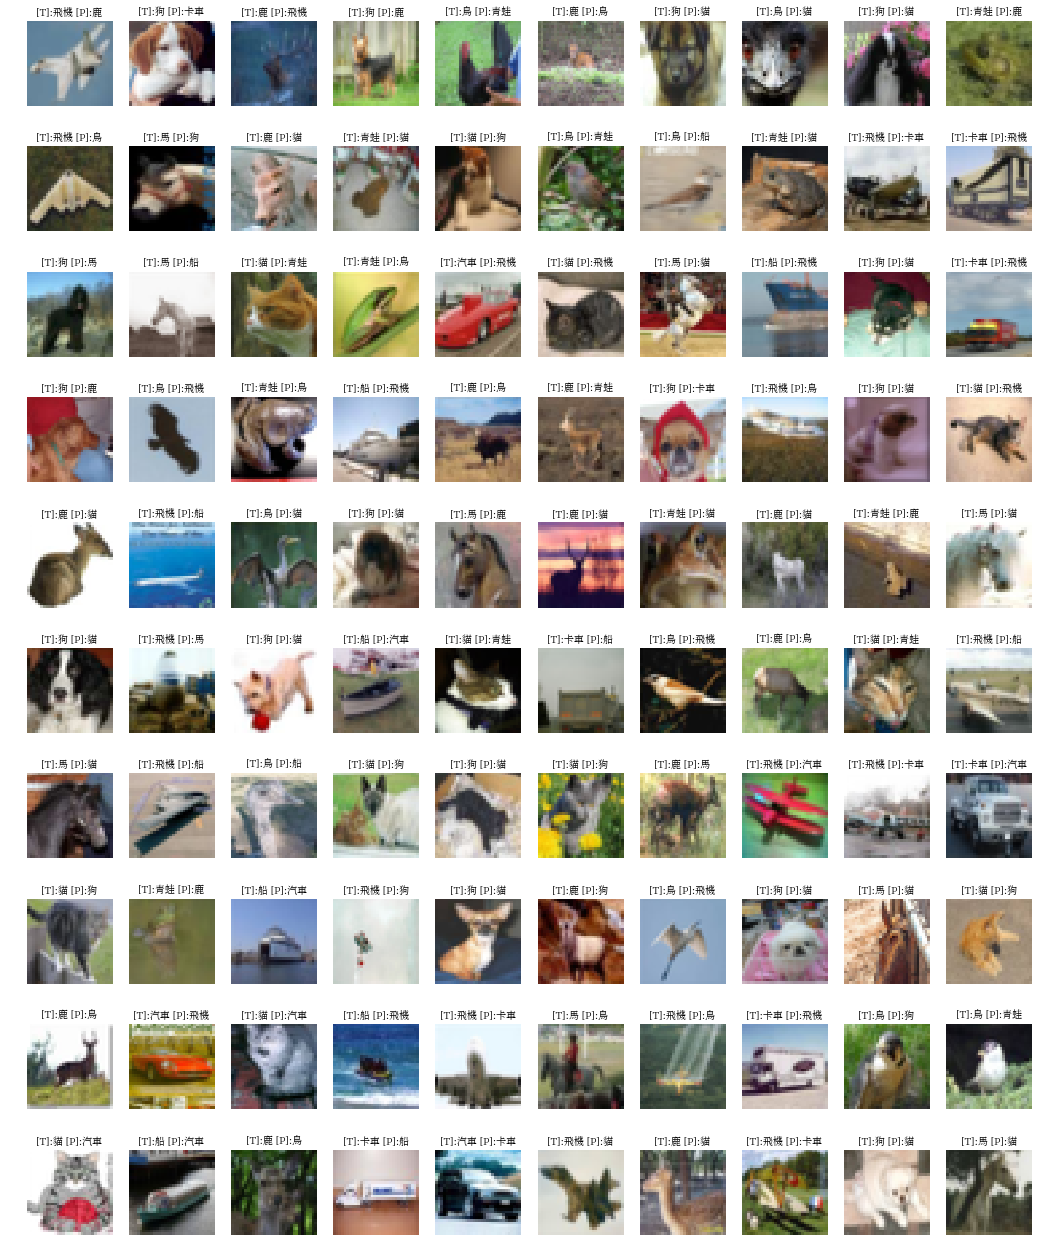

In [35]:
pre_false = []
ans_false = []
img_false = []

count = 0
for (index, p) in enumerate(pre):
    if not p == y_test[index][0]:
        pre_false.append(p)
        ans_false.append(y_test[index][0])
        img_false.append(x_test[index])
        count = count + 1
    if count == 100:
        break
        
width = 10
height = int(len(pre_false) / width) + 1
plt.figure(figsize=(18, 25))
for (index, img) in enumerate(img_false):
    plt.subplot(height, width, index + 1)
    # T原始答案　P預測答案
    t = "[T]:" + transdict[ans_false[index]] + " [P]:" + transdict[pre_false[index]]
    plt.title(t, fontproperties=font)
    plt.axis("off")
    plt.imshow(img)